# Morphologic exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import toyplot
import toyplot.svg

# %matplotlib widget

In [2]:
# df_phy = pd.read_csv("measurements_specimens_in_phylogeny.csv", 
#                  sep=",",
#                  )

In [3]:
df_phy = pd.read_csv("measurements_specimens_in_phylogeny-addedTrichomeInfo.csv", 
                 sep=",",
                 )

In [4]:
df_jordan = pd.read_csv("LAST_leaf_data_reduced_January 2022_MJD.csv", 
                 sep=",",
                 )

In [5]:
df = pd.concat([df_phy, df_jordan], axis=0)

In [6]:
df

,Specimen_ID,new_name,units,petioleLength,length,width,area,bladePerimeter,bladeCircularity,aspect_ratio,...,T_density,angle_b,angle_t,trichome_q,region,trichome_4,trichome_2,type,stellate_hairs_stalked,c_gravity
0,PWS_3883,seemenii,cm,0.719,9.851,4.216,32.616,27.178,0.555,2.336575,...,0.000000,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN
1,PWS_3884,seemenii,cm,1.072,8.502,4.224,28.204,29.297,0.413,2.012784,...,0.238932,NaN,NaN,NaN,NaN,1,NaN,NaN,0,NaN
2,PWS_3885,seemenii,cm,1.187,7.100,3.197,17.827,20.118,0.554,2.220832,...,0.000000,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN
3,PWS_3886,seemenii,cm,0.455,5.002,2.353,9.245,13.801,0.610,2.125797,...,0.000000,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN
4,PWS_3887,seemenii,cm,0.709,9.306,3.429,25.059,23.511,0.570,2.713911,...,0.085067,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,villosum_W_Harris_9255_B_a,villosum,NaN,NaN,11.604,7.403,67.469,NaN,NaN,1.567473,...,0.208136,161.0,81.0,107.07,jamaica,3,2.0,IGE,1,0.533437
653,subdentatum_DSCN8761_A_b,villosum,NaN,NaN,4.922,2.771,10.714,NaN,NaN,1.776254,...,0.233032,140.0,73.0,4.97,jamaica,2,1.0,IGE,0,0.625762
654,villosum_MD_628_a,villosum,NaN,NaN,7.597,5.225,31.178,NaN,NaN,1.453971,...,0.246800,119.0,83.0,973.72,jamaica,3,2.0,IGE,1,0.506779
655,subdentatum_DSCN8702_B_b,villosum,NaN,NaN,5.180,2.854,11.612,NaN,NaN,1.814996,...,0.263172,122.0,59.0,4.97,jamaica,2,1.0,IGE,0,0.415058


In [7]:
#removing trailing spaces in names to avoid index duplication
df['new_name'] = df['new_name'].str.strip()

In [8]:
# drop everything but incarum, seemanii and new_name_2
df = df[(df.new_name == 'seemenii') | (df.new_name == 'new_name_2') | (df.new_name == 'incarum')]
df.shape

(79, 21)

In [9]:
df

,Specimen_ID,new_name,units,petioleLength,length,width,area,bladePerimeter,bladeCircularity,aspect_ratio,...,T_density,angle_b,angle_t,trichome_q,region,trichome_4,trichome_2,type,stellate_hairs_stalked,c_gravity
0,PWS_3883,seemenii,cm,0.719,9.851,4.216,32.616,27.178,0.555,2.336575,...,0.000000,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN
1,PWS_3884,seemenii,cm,1.072,8.502,4.224,28.204,29.297,0.413,2.012784,...,0.238932,NaN,NaN,NaN,NaN,1,NaN,NaN,0,NaN
2,PWS_3885,seemenii,cm,1.187,7.100,3.197,17.827,20.118,0.554,2.220832,...,0.000000,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN
3,PWS_3886,seemenii,cm,0.455,5.002,2.353,9.245,13.801,0.610,2.125797,...,0.000000,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN
4,PWS_3887,seemenii,cm,0.709,9.306,3.429,25.059,23.511,0.570,2.713911,...,0.085067,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,PWS_3884_2_B_a,seemenii,NaN,NaN,8.399,4.038,26.632,NaN,NaN,2.079990,...,0.247324,74.0,60.0,4.97,peru_bol,1,1.0,IGE,0,0.467913
485,PWS_3901_B_ab,seemenii,NaN,NaN,7.339,4.152,23.930,NaN,NaN,1.767582,...,0.319463,108.0,71.0,4.97,peru_bol,1,1.0,IGE,0,0.487805
486,FM_495808_A,seemenii,NaN,NaN,5.734,2.343,10.554,NaN,NaN,2.447290,...,0.365612,77.0,60.0,4.97,peru_bol,1,1.0,IGE,0,0.538891
487,ayavacense_4_Sud_Yungas,seemenii,NaN,NaN,9.112,3.699,26.474,NaN,NaN,2.463368,...,0.421171,82.0,72.0,4.97,peru_bol,1,1.0,IGE,0,0.526498


## Create dict with clades and samples

In [10]:
#Import tree fulldataset tree with real ayava
import toytree
treeFile = f"../phylogeny/analysis-raxml/RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling"
TREE = toytree.tree(treeFile)

outgroup  = ["triphyllum_Edwards_2014_04",
             "triphyllum_PWS_4011",
             "ayavacense_PWS_4002",
             "triphyllum_PWS_1769"
]

rtree = TREE.root(outgroup) #.ladderize()

In [11]:
# define groups using the main clades (c1 to c7)

idxs_clades = [94,89,84,79,75,68,67]
# rtree.draw(use_edge_lengths=False, node_labels=True, node_sizes=20)

cladesdict = {}
for index, node in enumerate(idxs_clades):
    tips = rtree.get_tip_labels(node)
    
    # specimens = []
    for tip in tips:
        info = tip.split("_")
        specimen = info[-2] +"_"+ info[-1] 
        # specimens.append(specimen)
    
        cladesdict[specimen] = f"c{index+1}"

# imap["outgroup"] = outgroup    

# cladesdict

In [12]:
# check the clade of the samples we have morpho data and create a dict to put names in our plots

cladesdict_morpho_names = {}

for sample in list(df["Specimen_ID"]):
    cladesdict_morpho_names[sample] = " "
    for sample_in_tree in cladesdict.keys():
        if sample_in_tree in sample: 
            cladesdict_morpho_names[sample] = cladesdict[sample_in_tree]

cladesdict_morpho_names

{'PWS_3883': 'c4',
 'PWS_3884': 'c4',
 'PWS_3885': 'c4',
 'PWS_3886': 'c4',
 'PWS_3887': 'c4',
 'PWS_3888': 'c4',
 'PWS_3889': 'c4',
 'PWS_3890': 'c4',
 'PWS_3891': 'c4',
 'PWS_3893': 'c4',
 'PWS_3894': 'c7',
 'PWS_3895': 'c7',
 'PWS_3896': 'c7',
 'PWS_3897': 'c7',
 'PWS_3898': 'c7',
 'PWS_3899': 'c7',
 'PWS_3900': 'c7',
 'PWS_3901': 'c6',
 'PWS_3902': 'c6',
 'PWS_3903': 'c6',
 'PWS_3904': 'c5',
 'PWS_3905': 'c5',
 'PWS_3906': 'c5',
 'PWS_3907': 'c5',
 'PWS_3908': 'c5',
 'PWS_3909': 'c7',
 'PWS_3910': 'c7',
 'PWS_3911': 'c7',
 'PWS_3912': 'c7',
 'PWS_3913': 'c7',
 'PWS_4020': 'c2',
 'PWS_4021': 'c2',
 'PWS_4022': 'c2',
 'PWS_4023': 'c2',
 'PWS_4024': 'c2',
 'PWS_4025': 'c2',
 'PWS_4026': 'c1',
 'PWS_4027': 'c1',
 'PWS_4028': 'c1',
 'PWS_4029': 'c1',
 'PWS_4030': 'c1',
 'Fuentes_4724': 'c3',
 'Fuentes_8750': 'c3',
 'Maldonado_3040': 'c3',
 'seemenii_2': ' ',
 'seemenii_5': ' ',
 'HUH_00266692_A2b': ' ',
 'PWS_3894_a': 'c7',
 'PWS_3899_B_ab': 'c7',
 'PWS_3913_A_b': 'c7',
 'PWS_3900_ab': 

In [13]:
df['group'] = df['Specimen_ID'].map(cladesdict_morpho_names)

/tmp/ipykernel_3425373/3758028058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['Specimen_ID'].map(cladesdict_morpho_names)


In [14]:
df

,Specimen_ID,new_name,units,petioleLength,length,width,area,bladePerimeter,bladeCircularity,aspect_ratio,...,angle_b,angle_t,trichome_q,region,trichome_4,trichome_2,type,stellate_hairs_stalked,c_gravity,group
0,PWS_3883,seemenii,cm,0.719,9.851,4.216,32.616,27.178,0.555,2.336575,...,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN,c4
1,PWS_3884,seemenii,cm,1.072,8.502,4.224,28.204,29.297,0.413,2.012784,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0,NaN,c4
2,PWS_3885,seemenii,cm,1.187,7.100,3.197,17.827,20.118,0.554,2.220832,...,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN,c4
3,PWS_3886,seemenii,cm,0.455,5.002,2.353,9.245,13.801,0.610,2.125797,...,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN,c4
4,PWS_3887,seemenii,cm,0.709,9.306,3.429,25.059,23.511,0.570,2.713911,...,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN,c4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,PWS_3884_2_B_a,seemenii,NaN,NaN,8.399,4.038,26.632,NaN,NaN,2.079990,...,74.0,60.0,4.97,peru_bol,1,1.0,IGE,0,0.467913,c4
485,PWS_3901_B_ab,seemenii,NaN,NaN,7.339,4.152,23.930,NaN,NaN,1.767582,...,108.0,71.0,4.97,peru_bol,1,1.0,IGE,0,0.487805,c6
486,FM_495808_A,seemenii,NaN,NaN,5.734,2.343,10.554,NaN,NaN,2.447290,...,77.0,60.0,4.97,peru_bol,1,1.0,IGE,0,0.538891,
487,ayavacense_4_Sud_Yungas,seemenii,NaN,NaN,9.112,3.699,26.474,NaN,NaN,2.463368,...,82.0,72.0,4.97,peru_bol,1,1.0,IGE,0,0.526498,


In [15]:
df.to_csv("Stable3_morphologicalData.csv")

## Initial test

### Check correlation between variables

In [16]:
df.columns

Index(['Specimen_ID', 'new_name', 'units', 'petioleLength', 'length', 'width',
       'area', 'bladePerimeter', 'bladeCircularity', 'aspect_ratio',
       'n_marginal_teeth', 'T_density', 'angle_b', 'angle_t', 'trichome_q',
       'region', 'trichome_4', 'trichome_2', 'type', 'stellate_hairs_stalked',
       'c_gravity', 'group'],
      dtype='object')

In [17]:
allfeatures = ['length', 
               'width', 
               'area', 
               # 'c_gravity', 
               'aspect_ratio', 
               'T_density',
               # 'angle_b', 
               # 'angle_t', 
               # 'bladeCircularity',
               # 'trichome_q', 
               'trichome_4', 
               # 'trichome_2', 
               # 'stellate_hairs_stalked'
              ]
cov_data = np.corrcoef(df[allfeatures].T)

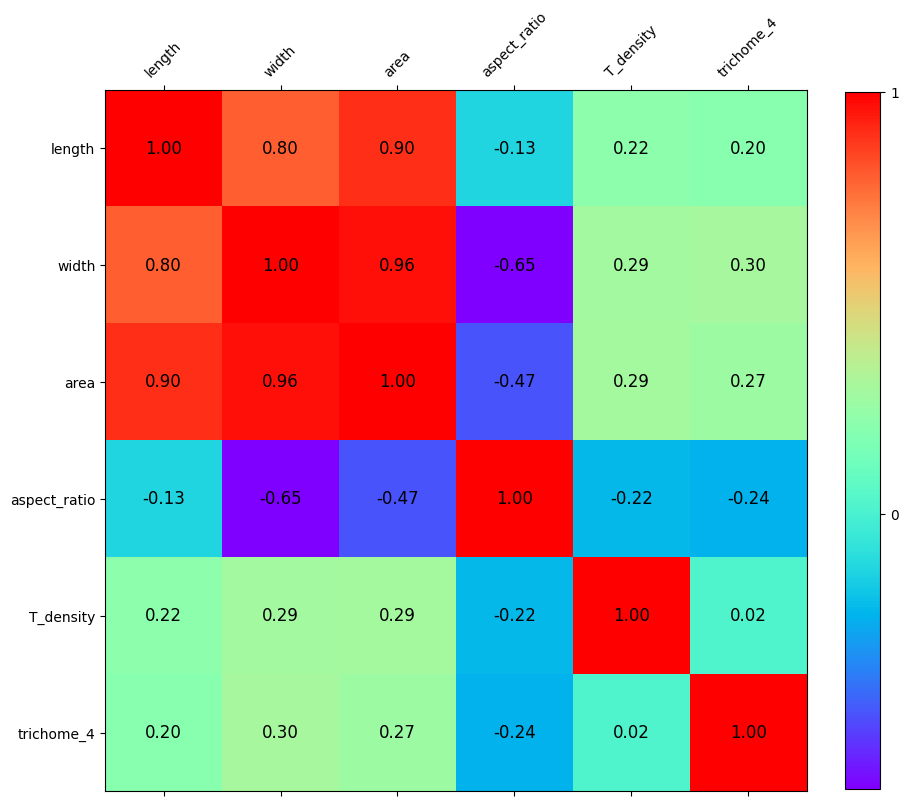

In [18]:
plt.figure(figsize=(10,10))
img = plt.matshow(cov_data, cmap=plt.cm.rainbow, fignum=1)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")

        
plt.xticks(ticks=range(0,len(allfeatures)),labels=allfeatures, rotation=45)
plt.yticks(ticks=range(0,len(allfeatures)),labels=allfeatures)
plt.show()

### PCA

In [19]:
from sklearn.preprocessing import StandardScaler

def do_pca(features, components=3):
    
    #all features
    # features = ['length', 'width', 'area', 'c_gravity', 'aspect_ratio', 'T_density',
    #        'angle_b', 'angle_t', 'trichome_q', 'trichome_4', 'trichome_4']

    #previous analysis features
    # features = ['area', 'aspect_ratio', 'T_density', 'trichome_q']

    #no trichome_q
    # features = ['area', 'aspect_ratio', 'T_density']

    #all quantitative features
    # features = ['length', 'width', 'area', 'c_gravity', 'aspect_ratio', 'T_density',
    #        'angle_b', 'angle_t', 'trichome_q']


    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,['new_name']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    # scaled_data = pd.DataFrame(data = x, 
    #                        columns = features,
    #                        index=df["new_name"].values)
    # # scaled_data.to_csv("scaled_data.csv")
    
    from sklearn.decomposition import PCA
    pca = PCA(n_components=components)
    principalStandComponents = pca.fit_transform(x)
    principalStandDf = pd.DataFrame(data = principalStandComponents, 
                               columns = [f"pc{c}" for c in range(1, components+1)],
                               index=df["new_name"].values)
    
    return pca, principalStandDf

In [20]:
# ###DEPRECATED,  see next cell for matplotlib alternative


# def plot_pca(principalDf, name_column=None):
#     canvas = toyplot.Canvas(width=600, height=600)

#     axes = canvas.cartesian()
    
#     # axes.hlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})
#     # axes.vlines(0, color="black", style={"stroke-dasharray": 5, "stroke-width": 4})

    
#     # markers_colors_dict = {"new_name_2": toyplot.color.Palette()[0],
#     #     "seemenii": toyplot.color.Palette()[1],
#     #     "incarum": toyplot.color.Palette()[2],
#     #     # "D": toyplot.color.Palette()[3],
#     #    }

#    #  markers_colors_dict = {"new_name_2": "#33CB85",
#    #  "seemenii": "#33BAFF",
#    #  "incarum": "#F9918A",
#    # }
    
#    ## colors based on clades rather than initial species
#     markers_colors_dict = {
#         "c6" : "#FFD92E",
#         "c4" : "#E789C3",
#         "c3" : "#8D9FCA",
#         "c5" : "#A6D753",
#         "c2" : "#FB8D61",
#         "c1" : "#66C2A4",
#         "c7" : "#E4C493",
#         " ": "white"
#     }
    
    
#     mark = axes.scatterplot(principalDf.iloc[:,0],#['pc1'],
#                         principalDf.iloc[:,1],#['pc2'],
# #                                 color="lightgray",
#                         # color=[markers_colors_dict[i] for i in principalDf.index],
#                         color=[markers_colors_dict[i] for i in principalDf.sample_name],                            
#                         title=principalDf[name_column],
#                         size=10,
#                         mstyle={"opacity": 1.0, 
#                                 "stroke":"black"
#                                },
# #                                 marker=markers
#                        )
    
#     # add labels to each point
#     # axes.text(principalDf.iloc[:,0] * 1.1,#['pc1'],
#     #           principalDf.iloc[:,1] * 1.1 ,#['pc2'],
#     #           principalDf[name_column],
#     #           color="black",
#     #          )

            
#     coeff = np.transpose(pca.components_[0:4, :])
#     n = coeff.shape[0]

#     for i in range(n):
#         loading_x = coeff[i,0] * 2.5
#         loading_y = coeff[i,1] * 2.5
#         loading_name = df.loc[:, features].columns[i]
#         axes.plot([0, loading_x],[0, loading_y], color="gray")
#         axes.text(loading_x*1.15,loading_y*1.15, loading_name, color="grat", style={"font-size":"16px"})

#     axes.text(-3, 3, f"Loadings", style={"font-size":"16px"},color="black");
    
#     return canvas

# c = plot_pca(principalDF, name_column="sample_name")
# import toyplot.svg
# toyplot.svg.render(c, f"./svgs/{name}_PCA.svg")

In [33]:
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.spatial import ConvexHull, convex_hull_plot_2d


def plot_pca_paperColors(pca, principalDf, title="", alpha=1.0, put_names=False, legend=True, classification_column="sample_name", feature_names=None, 
                         ignore_unclassified=False, convex=[], remove_convex_points=True, convex_alpha=0.25):
    
    
    principalDf = principalDf.dropna(axis='rows')
    
    categories = principalDf.loc[:, classification_column].values

    
    
    markers_colors_dict = {
        "c6" : "#FFD92E",
        "c4" : "#E789C3",
        "c3" : "#8D9FCA",
        "c5" : "#A6D753",
        "c2" : "#FB8D61",
        "c1" : "#66C2A4",
        "c7" : "#E4C493",
        " ": "white",
        "IGE": "#ff0000",
        "SGE": "#00ff00",
        "LPT": "#0000ff",
        "DEN": "black"
    }
    
    
    
    
    #add loadings       
    coeff = np.transpose(pca.components_[0:4, :])
    n = coeff.shape[0]

    for i in range(n):
        loading_x = coeff[i,0] * 2.5
        loading_y = coeff[i,1] * 2.5
        loading_name = df.loc[:, features].columns[i]
        if feature_names:
            loading_name = feature_names[loading_name]
        # loading_name = loading_name.split("_")[1]
        plt.plot([0, loading_x],[0, loading_y], c="black", alpha=0.2, zorder=-1)
        plt.text(loading_x,loading_y, loading_name, color="black", alpha=0.7, zorder=-1, fontsize=16)

        
        
    legend_elements = []
    
    
    #plot each category as independent set (put colors automatically)
    for i, n in enumerate(np.unique(categories)):
        if n in convex:
            alpham = convex_alpha
        else:
            alpham = alpha
        
        
        #Ignore points without classification
        if ignore_unclassified and n == " ":
            continue
        
        
        subset = principalDf[categories == n] #create a mask based on the categories to subset the nmds fit results
        
        #draw convex around points selected in convex list
        if convex and n in convex:
            points = subset[['pc1', 'pc2']].to_numpy()
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                plt.plot(points[simplex, 0], points[simplex, 1], color=markers_colors_dict[n], alpha=alpham)

       
       
            
        #remove dot if convex elements are not in plot
        if remove_convex_points and n in convex:
            linestyle = "-"
            markersize = 0
        else:
            linestyle = "None"
            markersize = 10
            
            
        #add elemente to legend
        legend_elements.append(Line2D([0], [0], marker='o', color=markers_colors_dict[n], label=n, linestyle=linestyle, markersize=markersize, alpha=alpham, markeredgewidth=1, markeredgecolor="black"))
        
        
        
        # avoid plot points if flag is true in convex
        if remove_convex_points and n in convex:
            continue
       
        
        for xp, yp in zip(subset.iloc[:,0], subset.iloc[:,1]):
            scatter = plt.scatter(xp, 
                        yp, 
                        label=n,
                        marker="o", 
                        color=markers_colors_dict[n],
                        alpha=alpham,
                        s=100,
                        edgecolors="black", 
                       )
            
        
        

    
    
                
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
#     if legend: 
#         plt.legend(fontsize="small")
    
    plt.legend(handles=legend_elements,bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
    # legend_elements = [Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='g', markersize=15)),
    #                    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='g', markersize=15)]

    # plt.title(title)
    plt.rc('font', size=16)
    
    plt.show()

In [35]:
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def plot_pca_paperColors(pca, principalDf, title="", alpha=1.0, put_names=False, legend=True, classification_column="sample_name", feature_names=None, 
                         ignore_unclassified=False, convex=[], remove_convex_points=True, convex_alpha=0.25, pc_x=1, pc_y=2):
    
    principalDf = principalDf.dropna(axis='rows')
    categories = principalDf.loc[:, classification_column].values

    markers_colors_dict = {
        "c6" : "#FFD92E",
        "c4" : "#E789C3",
        "c3" : "#8D9FCA",
        "c5" : "#A6D753",
        "c2" : "#FB8D61",
        "c1" : "#66C2A4",
        "c7" : "#E4C493",
        " ": "white",
        "IGE": "#ff0000",
        "SGE": "#00ff00",
        "LPT": "#0000ff",
        "DEN": "black"
    }
    
    coeff = np.transpose(pca.components_[0:4, :])
    n = coeff.shape[0]

    for i in range(n):
        loading_x = coeff[i,pc_x-1] * 2.5
        loading_y = coeff[i,pc_y-1] * 2.5
        loading_name = df.loc[:, features].columns[i]
        if feature_names:
            loading_name = feature_names[loading_name]
        plt.plot([0, loading_x],[0, loading_y], c="black", alpha=0.2, zorder=-1)
        plt.text(loading_x,loading_y, loading_name, color="black", alpha=0.7, zorder=-1, fontsize=16)

    legend_elements = []
    
    for i, n in enumerate(np.unique(categories)):
        if n in convex:
            alpham = convex_alpha
        else:
            alpham = alpha
        
        if ignore_unclassified and n == " ":
            continue
        
        subset = principalDf[categories == n]
        
        if convex and n in convex:
            points = subset[['pc'+str(pc_x), 'pc'+str(pc_y)]].to_numpy()
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                plt.plot(points[simplex, 0], points[simplex, 1], color=markers_colors_dict[n], alpha=alpham)
       
        if remove_convex_points and n in convex:
            linestyle = "-"
            markersize = 0
        else:
            linestyle = "None"
            markersize = 10
            
        legend_elements.append(Line2D([0], [0], marker='o', color=markers_colors_dict[n], label=n, linestyle=linestyle, markersize=markersize, alpha=alpham, markeredgewidth=1, markeredgecolor="black"))
        
        if remove_convex_points and n in convex:
            continue
       
        for xp, yp in zip(subset.iloc[:,pc_x-1], subset.iloc[:,pc_y-1]):
            scatter = plt.scatter(xp, 
                        yp, 
                        label=n,
                        marker="o", 
                        color=markers_colors_dict[n],
                        alpha=alpham,
                        s=100,
                        edgecolors="black", 
                       )
            
    plt.xlabel(f'PC{pc_x} ({pca.explained_variance_ratio_[pc_x-1]:.2%})')
    plt.ylabel(f'PC{pc_y} ({pca.explained_variance_ratio_[pc_y-1]:.2%})')
    plt.legend(handles=legend_elements,bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.rc('font', size=16)
    plt.show()


In [26]:
name = "3-pca-mixingDatasets_altCols"

In [27]:
features = ['length', 
            # 'width', 
            'area', 
            'aspect_ratio', 
            'T_density', 
            # 'bladeCircularity',
            # 'trichome_4', # This is categorical, this violates PCA assumption
           ]


feature_names = {'length': "Lenght", 
        # 'width': "Width", 
        'area': "Area", 
        'aspect_ratio': "Aspect-ratio", 
        'T_density': "Tooth density", 
        # 'bladeCircularity',
        # 'trichome_4':"Pubescence",
        }

pca, principalDF = do_pca(features, components=4)

In [28]:
print(pca.explained_variance_ratio_)

[0.55499354 0.23664828 0.20045094 0.00790723]


In [29]:
# add samples names to the table
principalDF["sample_name"] = [cladesdict_morpho_names[i] for i in df["Specimen_ID"].values]
principalDF["Specimen_ID"] = df["Specimen_ID"].values
principalDF

,pc1,pc2,pc3,pc4,sample_name,Specimen_ID
seemenii,1.392882,-1.258372,-0.328178,-0.114694,c4,PWS_3883
seemenii,1.464337,0.420320,0.352116,-0.116861,c4,PWS_3884
seemenii,-0.165574,-0.148384,-0.504164,-0.149563,c4,PWS_3885
seemenii,-1.202713,0.661076,-0.672849,-0.015978,c4,PWS_3886
seemenii,0.717281,-1.131139,0.577938,-0.203093,c4,PWS_3887
...,...,...,...,...,...,...
seemenii,1.316103,0.423900,0.483488,-0.143777,c4,PWS_3884_2_B_a
seemenii,1.219431,1.381599,0.394597,-0.119400,c6,PWS_3901_B_ab
seemenii,-0.393573,1.384013,1.480593,-0.046432,,FM_495808_A
seemenii,1.603075,0.409636,1.823803,-0.209134,,ayavacense_4_Sud_Yungas


In [27]:
principalDF.to_csv(f"results/{name}_PCA_DF.csv", index_label="taxon")

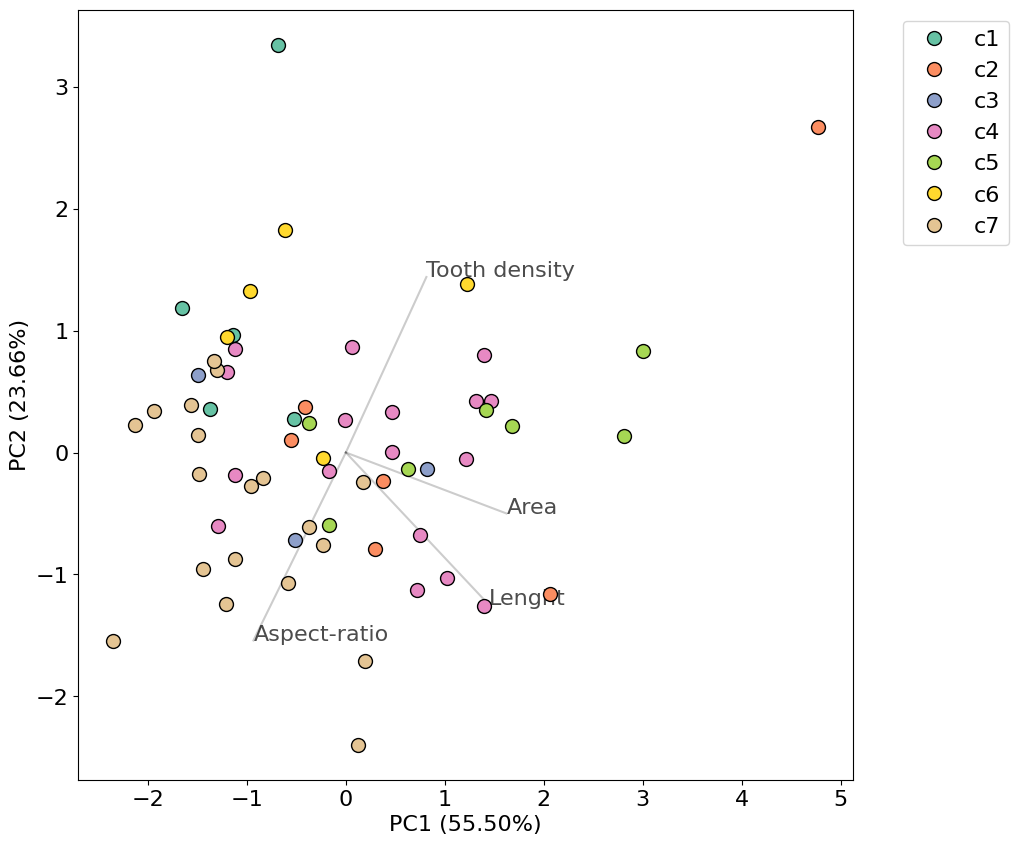

In [38]:
fig = plt.figure(figsize=(10, 10))

c = plot_pca_paperColors(pca, principalDF, feature_names=feature_names, ignore_unclassified=True, pc_x= 1, pc_y=2
                         # convex=["c7", "c1"], remove_convex_points=False, convex_alpha=1.0
                        )

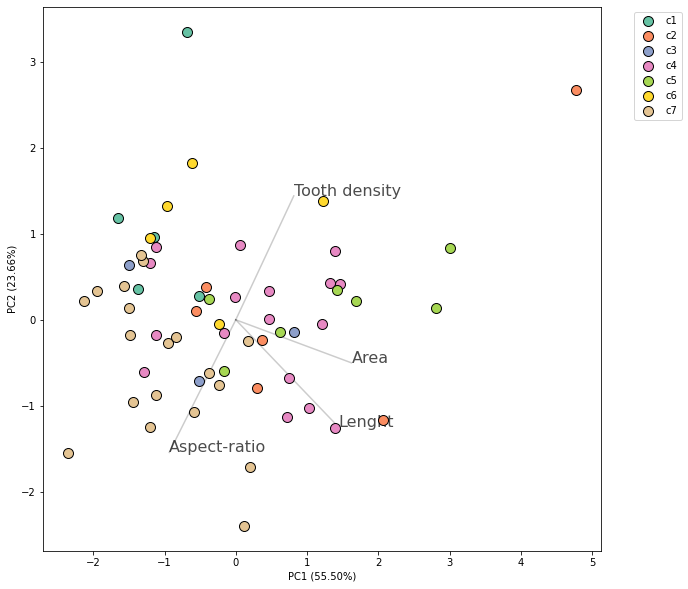

In [24]:
fig = plt.figure(figsize=(10, 10))

c = plot_pca_paperColors(pca, principalDF, feature_names=feature_names, ignore_unclassified=True, 
                         # convex=["c7", "c1"], remove_convex_points=False, convex_alpha=1.0
                        )
fig.savefig(f"./svgs/{name}_altcols_ignoringUnclassified.png")
fig.savefig(f"./svgs/{name}_altcols_ignoringUnclassified.svg")

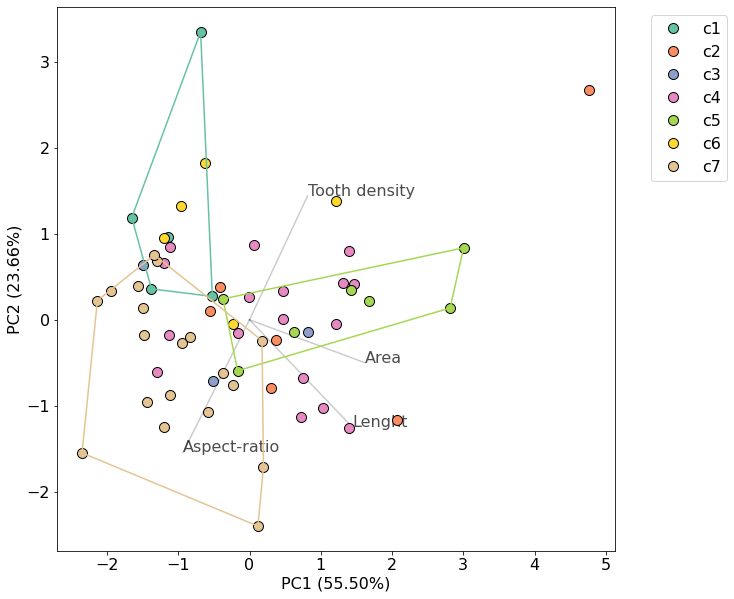

In [25]:
fig = plt.figure(figsize=(10, 10))

c = plot_pca_paperColors(pca, principalDF, feature_names=feature_names, ignore_unclassified=True, 
                         convex=["c7", "c1", "c5"], remove_convex_points=False, convex_alpha=1.0
                        )
fig.savefig(f"./svgs/{name}_altcols_withConvex_ignoringUnclassified.png")
fig.savefig(f"./svgs/{name}_altcols_withConvex_ignoringUnclassified.svg")

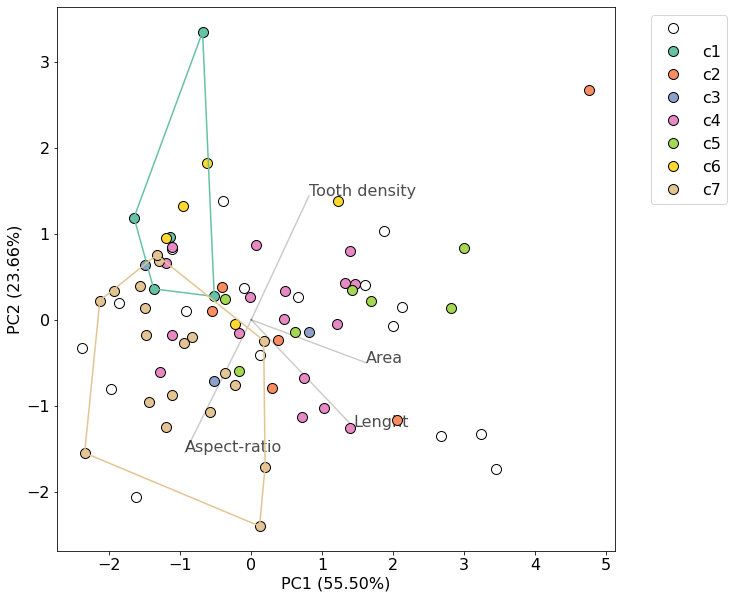

In [26]:
fig = plt.figure(figsize=(10, 10))

c = plot_pca_paperColors(pca, principalDF, feature_names=feature_names, ignore_unclassified=False,
                                                 convex=["c7", "c1"], remove_convex_points=False, convex_alpha=1.0
                        )
fig.savefig(f"./svgs/{name}_altcols_withconvex.png")
fig.savefig(f"./svgs/{name}_altcols_withconvex.svg")

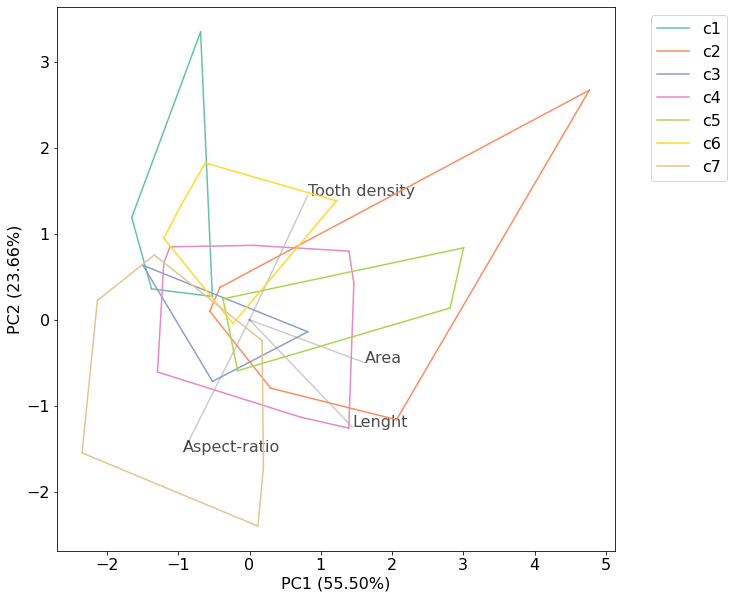

In [27]:
fig = plt.figure(figsize=(10, 10))

c = plot_pca_paperColors(pca, principalDF, feature_names=feature_names, ignore_unclassified=True,
                                                 convex=["c2", "c3", "c4", "c5", "c6", "c7", "c1"], remove_convex_points=True, convex_alpha=1.0
                        )
fig.savefig(f"./svgs/{name}_altcols_ONLYconvex.png")
fig.savefig(f"./svgs/{name}_altcols_ONLYconvex.svg")

## NMDS

Reviewers suggested do a non-metric multi-dimensional scaling to find "real" groups in the data. I will do this with the MDS module in sklearn

NOTE: Reading about this method, apparently if we use euclidean distance to do the reduction, the result is "identical" to the PCA. By default sklearn uses euclidean distances.
However, this is not 100% true following the result I got, in both metric and non-metric

"A good rule of thumb: stress < 0.05 provides an excellent representation in reduced dimensions, < 0.1 is great, < 0.2 is good/ok, and stress < 0.3 provides a poor representation"

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import DistanceMetric
from matplotlib.lines import Line2D 
from scipy.spatial import ConvexHull

import toyplot

In [42]:
import sklearn
sklearn.__version__

'1.2.0'

In [43]:
## Define all functions

In [44]:
def prepare_data(features, distance="euclidean"):
        # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,['new_name']].values

    # Standardizing the features
    x_scaled_std = StandardScaler().fit_transform(x)
    # Another way of standarizing features (commonly found in MDS examples)
    # x_scaled_std = MinMaxScaler().fit_transform(x)
    
    
    
    if distance != "euclidean":
        # distance = "manhattan"
        # distance = "chebyshev"
        # distance = "minkowski"
        dist = DistanceMetric.get_metric(distance)
        x_scaled_std = dist.pairwise(x_scaled_std)
    
    return x_scaled_std

In [45]:
def find_optimal_components(x_scaled_std, save_svg=True, dissimilarity="euclidean", name=""):
    ## Select the best n_components, The elbow of the curve is a good choice for the optimal value of n_components
    stress = []
    # Max value for n_components
    max_range = 21
    for dim in range(1, max_range):
        # Set up the MDS object
        nmds = MDS(n_components=dim, 
                   random_state=0, 
                   max_iter=500, 
                   n_init=1000, 
                   metric=False, 
                   dissimilarity=dissimilarity, 
                   n_jobs=-1,)
        # Apply nMDS
        pts = nmds.fit_transform(x_scaled_std)
        # Retrieve the stress value
        stress.append(nmds.stress_)
    # Plot stress vs. n_components    
    plt.plot(range(1, max_range), stress)
    plt.xticks(range(1, max_range, 1))
    plt.xlabel('n_components')
    plt.ylabel('stress')
    
    if save_svg:
        plt.savefig(f"./svgs/{name}_Elbow_optimalComponents.svg")
    
    # plt.show()

In [46]:
def nmds(x_scaled_std, n_components=4, seed=42, dissimilarity="euclidean", n_init=1000000, max_iter=1000000):
    seed = seed
    nmds = MDS(
        n_components=n_components,#defined using previous analysis
        metric=False, #make mds non-metric
        max_iter=max_iter,
        eps=1e-12,
        random_state=seed,
        n_jobs=-1, #use all cores
        n_init=n_init, #run multiple times with different init values and pick the best (lowest stress) above 5000 result are quite stable
        dissimilarity=dissimilarity,
    )

    npos_std = nmds.fit_transform(x_scaled_std)
    
    print("Stress: ", nmds.stress_) 
    
    return npos_std

In [47]:
import itertools
def nmds_plot(npos_std, 
              save_svg=True, 
              three_dimensional=False, 
              name="NMDS", 
              put_names=True, 
              alpha=1.0, 
              lims=None, 
              rotation=None, 
              components=(0,1,2),
              legend=False,
              categories=None, #need to be a pandas series
              colors=None, 
              names_array=None, #np array 
              figsize = (10, 10),
              marker_size = 60,
              ignore_unclassified=False,
              convex=[], remove_convex_points=True, convex_alpha=0.25
             ):
    #plot nmds result
    
    # categories = df.loc[:, "type"].values
    # colors = {"seemenii": "#66c2a3",
    # "new_name_2": "#fa8c61",
    # "SGE":  "#8c9eca",
    # "D":  "#e68ac2"}
    
    legend_elements = []
    
    if three_dimensional:
        fig = plt.figure(figsize = figsize)
        ax = plt.axes(projection ="3d")
        
        for i, n in enumerate(np.unique(categories)):
            
            #Ignore points without classification
            if ignore_unclassified and n == " ":
                continue
            
            
            if n in convex:
                alpham = 0.25
            else:
                alpham = alpha

            legend_elements.append(Line2D([0], [0], marker='o', color=colors[n], label=n, linestyle='None', markersize=10, alpha=alpham, markeredgewidth=1, markeredgecolor="black"))
            
            subset = npos_std[categories == n] #create a mask based on the categories to subset the nmds fit results
            
            
            #draw convex around points selected in convex list
            if convex and n in convex:
                points = subset[:,[components[0],components[1],components[2]]]
                hull = ConvexHull(points)
                for simplex in hull.simplices:
                    ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2], color=colors[n], alpha=alpham)

            xp = [row[components[0]] for row in subset]
            yp = [row[components[1]] for row in subset]
            zp = [row[components[2]] for row in subset]

            #subset names
            

            names = names_array[categories == n]
            for i in range(len(subset)): #plot each point + it's index as text above
                ax.scatter(xp[i],yp[i],zp[i], alpha=alpham, color=colors[n], label=n if i == 0 else "", s=marker_size)
                if put_names: 
                    ax.text(xp[i],yp[i],zp[i],  names[i], size=10, zorder=1) 
        
        ax.set_xlabel(f'NMDS{components[0]+1}')
        ax.set_ylabel(f'NMDS{components[1]+1}')
        ax.set_zlabel(f'NMDS{components[2]+1}')
        
        if lims:
            ax.set_xlim(lims[0], lims[1])
            ax.set_ylim(lims[2], lims[3])
            ax.set_zlim(lims[4], lims[5])
        
        if rotation:
            ax.view_init(elev=rotation[0], azim=rotation[1])
        
        plt.legend(handles=legend_elements,bbox_to_anchor=(1.05, 1.0), loc='upper left')
        
        if legend: 
            plt.legend(title=f"NMDS", fontsize="small")  
        plt.title("NMDS (Euclidean) 3D")
        
        if save_svg:
            plt.savefig(f"./svgs/{name}_3d.svg")
                
    else:
#         fig = plt.figure(figsize = (8, 8))
#         ax = plt.axes()
        
        for i, n in enumerate(np.unique(categories)):
            
            #Ignore points without classification
            if ignore_unclassified and n == " ":
                continue
            
            if n in convex:
                alpham = convex_alpha
            else:
                alpham = alpha
                
                
            subset = npos_std[categories == n] #create a mask based on the categories to subset the nmds fit results
            
             #draw convex around points selected in convex list
            if convex and n in convex:
                points = subset[:,[components[0],components[1]]]
                hull = ConvexHull(points)
                for simplex in hull.simplices:
                    plt.plot(points[simplex, 0], points[simplex, 1], color=colors[n], alpha=alpham)




            #remove dot if convex elements are not in plot
            if remove_convex_points and n in convex:
                linestyle = "-"
                markersize = 0
            else:
                linestyle = "None"
                markersize = 10


            #add elemente to legend
            legend_elements.append(Line2D([0], [0], marker='o', color=colors[n], label=n, linestyle=linestyle, markersize=markersize, alpha=alpham, markeredgewidth=1, markeredgecolor="black"))



            # avoid plot points if flag is true in convex
            if remove_convex_points and n in convex:
                continue

            
            

            xp = [row[components[0]] for row in subset]
            yp = [row[components[1]] for row in subset]
            plt.scatter(xp,yp, label=n, c=colors[n], alpha=alpham, s=marker_size, edgecolors="black")

            names = names_array[categories == n]
            for i, label in enumerate(names):
                if put_names:
                    plt.annotate(label, (xp[i], yp[i]))
            #     final_table.at[label, "a_priori_group"] = n
                # print(label, xp[i], yp[i])
        
        
        # ax.set_xlabel(f'NMDS{components[0]+1}')
        # ax.set_ylabel(f'NMDS{components[1]+1}')   
        
        
        plt.xlabel(f'NMDS{components[0]+1}')
        plt.ylabel(f'NMDS{components[1]+1}')
        
        
        # plt.legend(handles=legend_elements)
        plt.legend(handles=legend_elements,bbox_to_anchor=(1.05, 1.0), loc='upper left')
        
        # if legend: 
        #     plt.legend(title=f"NMDS", fontsize="small")
        plt.title("NMDS")
        
        if save_svg:
            plt.savefig(f"./svgs/{name}.svg")

            
    # plt.show()
    # return ax

In [48]:
def find_optimal_k(npos_std, save_svg=True, **kwargs):
    #testing kmers (again elbow of the curve is ok)
    sse = {}
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k, 
                        # n_init=1000, 
                        # max_iter=10000,
                        **kwargs,
                       ).fit(npos_std)
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title("Elbow Criterion for defining K in Euclidean")
    
    if save_svg:
        plt.savefig(f"./svgs/{NAME}LAST_kmeans_Elbow_optimalK.svg")
        
    plt.show()

In [49]:
def clustering(npos_std, 
               n_clusters=4, 
               save_svg=True, 
               three_dimensional=False, 
               put_names=True, 
               rotation=None, 
               name="",
               components=(0,1,2),
               names_array=None, #np array 
               figsize=(10, 10)
              ):
    
    # define the model
    model = KMeans(n_clusters=n_clusters, max_iter=10000)
    # fit the model
    model.fit(npos_std)
    # assign a cluster to each example
    yhat = model.predict(npos_std)
    # retrieve unique clusters
    clusters = np.unique(yhat)
    # create scatter plot for samples from each cluster
    
    if three_dimensional:
        fig = plt.figure(figsize = figsize)
        ax = plt.axes(projection ="3d")

        for idcl, cluster in enumerate(clusters):
            # get row indexes for samples with this cluster
            subset = npos_std[yhat == cluster] 
            xp = [row[components[0]] for row in subset]
            yp = [row[components[1]] for row in subset]
            zp = [row[components[2]] for row in subset]
            # plt.scatter(xp,yp, label=n)
            # ax.scatter(xp, yp, zp)

            # names = df.loc[:, "new_name"].values[yhat == cluster]
            # for i, label in enumerate(names):
            #     ax.annotate(unique_sp_name(label), (xp[i], yp[i]))
                # table_clusters = table_clusters.append({"cluster": cluster, "species": label}, ignore_index=True)\
                # final_table.at[label, "kmeans_nmds_euclidean"] = cluster
                
            
            
            
            names = names_array[yhat == cluster]
            for i in range(len(subset)): #plot each point + it's index as text above
                ax.scatter(xp[i],yp[i],zp[i], color= plt.cm.tab10(idcl)) 
                if put_names:
                    ax.text(xp[i],yp[i],zp[i],  names[i], size=10, zorder=1)  
                
                
          
                    
        
        if rotation:
            ax.view_init(elev=rotation[0], azim=rotation[1])
        
        ax.set_xlabel(f'NMDS{components[0]+1}')
        ax.set_ylabel(f'NMDS{components[1]+1}')
        ax.set_zlabel(f'NMDS{components[2]+1}')
        plt.title(f"Clustering using K={n_clusters} KMeans (Euclidean NMDS) 3D")   

        if save_svg:
            plt.savefig(f"./svgs/{name}_NMDS_colored_kmeansClusters_3d.svg")
    else:
        for cluster in clusters:
            # get row indexes for samples with this cluster
            subset = npos_std[yhat == cluster] 
            xp = [row[components[0]] for row in subset]
            yp = [row[components[1]] for row in subset]
            plt.scatter(xp,yp)
            
            
            names = names_array[yhat == cluster]
            for i, label in enumerate(names):
                if put_names:
                    plt.annotate(label, (xp[i], yp[i]))

            # names = df.loc[:, "new_name"].values[yhat == cluster]
            # for i, label in enumerate(names):
            #     if put_names:
            #         plt.annotate(unique_sp_name(label), (xp[i], yp[i]))
            #     # table_clusters = table_clusters.append({"cluster": cluster, "species": label}, ignore_index=True)
            #     final_table.at[label, "kmeans_nmds_euclidean"] = cluster


        plt.xlabel(f'NMDS{components[0]+1}')
        plt.ylabel(f'NMDS{components[1]+1}')
        plt.title(f"Clustering K={n_clusters} - KMeans")    

        if save_svg:
            plt.savefig(f"./svgs/{name}_NMDS_colored_k4_kmeansClusters.svg")

    # show the plot
        # plt.show()

### Run NMDS

/gpfs/gibbs/project/edwards/cm2828/conda_envs/ipyrad/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/gpfs/gibbs/project/edwards/cm2828/conda_envs/ipyrad/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/gpfs/gibbs/project/edwards/cm2828/conda_envs/ipyrad/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/gpfs/gibbs/project/edwards/cm2828/conda_envs/ipyrad/lib/python3.11/site-packages/sklearn/manifold/_mds.py

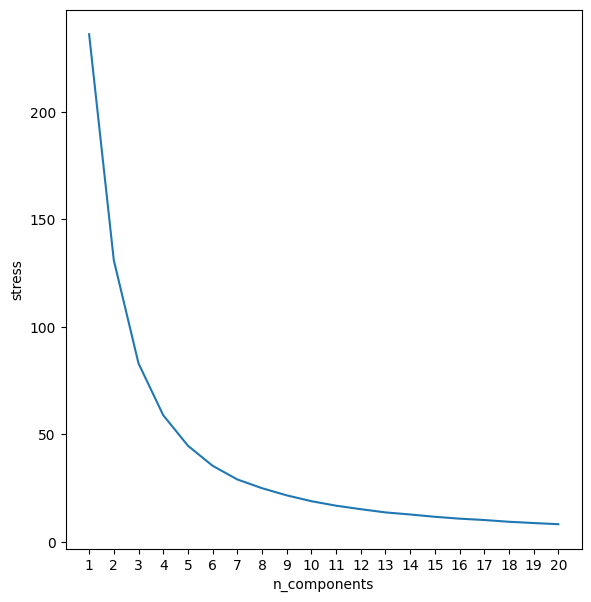

In [58]:
NAME = "3-nmds-mixingDatasets_all traits"

features = ['length', 
            'width', 
            'area', 
            # 'c_gravity', 
            'aspect_ratio', 
            'T_density',
            # 'angle_b', 
            # 'angle_t', 
            # 'trichome_q', 
            'trichome_4', 
            # 'trichome_2', 
            # 'stellate_hairs_stalked',
            # 'bladeCircularity',
              ]

# df = pd.read_csv("LAST_leaf_data_means_splvl_Jan2022.csv", sep=",") #global
# final_table = pd.DataFrame(columns=["a_priori_group","kmeans_nmds_euclidean"], index=df.loc[:, "new_name"].values)

#be sure trichome_2 is binary (mutate 2 to 0)
# df.loc[df["trichome_2"] == 2, "trichome_2"] = 0

####

## Dropping hirsutum and membranaceum
# df = df[~(df.new_name == 'hirsutum') & ~(df.new_name == 'membranaceum')]
# df = df[~(df.new_name == 'hirsutum')]
# df = df[~(df.new_name == 'membranaceum')]



x_scaled_std = prepare_data(features=features)


fig = plt.figure(figsize=(6.66, 7))
find_optimal_components(x_scaled_std, name=NAME)

In [51]:
npos_std = nmds(x_scaled_std, n_components=4)

/gpfs/gibbs/project/edwards/cm2828/conda_envs/ipyrad/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Stress:  0.04653087136955898


In [73]:
# import numpy as np
# import pandas as pd
# from sklearn.manifold import MDS
# import matplotlib.pyplot as plt

# def get_variable_contribution_to_nmds_dimention(npos_std, variable_names):
#     # Calculate the correlation between original variables and NMDS coordinates
#     correlations = np.corrcoef(npos_std)

#     # Create a DataFrame for the correlation matrix with variable names as columns and index
#     correlation_df = pd.DataFrame(correlations[:npos_std.shape[1], :npos_std.shape[1]], columns=variable_names)

#     # Plot variable contributions
#     plt.figure(figsize=(10, 8))
#     plt.matshow(correlation_df, cmap="RdYlBu_r")
#     plt.colorbar()
#     plt.title("Variable Contributions to NMDS Dimensions")
#     plt.xlabel("NMDS Dimensions")
#     plt.ylabel("Original Variables")
#     plt.xticks(np.arange(npos_std.shape[1]), np.arange(1, npos_std.shape[1]+1))
#     plt.yticks(np.arange(len(variable_names)), variable_names)
#     plt.savefig(f"./svgs/{name}_NMDS_colored_k4_variablecontributiontonmdsdimention.svg")
#     plt.show()


# # Define the variable names
# variable_names = features[:npos_std.shape[1]]  # Use only the first npos_std.shape[1] features

# # Plot variable contributions using NMDS coordinates
# get_variable_contribution_to_nmds_dimention(npos_std, variable_names)

# # -_o!

In [95]:
npos_std_df = pd.DataFrame(npos_std, index=df["new_name"] + "-" + df["Specimen_ID"], columns=[f"nmds_{i+1}" for i in range(npos_std.shape[1])])
# npos_std_df.head()

In [97]:
npos_std_df2 = pd.DataFrame(npos_std, index=df["Specimen_ID"], columns=[f"nmds_{i+1}" for i in range(npos_std.shape[1])])
# npos_std_df.head()

In [ ]:
npos_std_df2["clade"] = [cladesdict_morpho_names[i] for i in df["Specimen_ID"].values]

In [98]:
npos_std_df2

,nmds_1,nmds_2,nmds_3,nmds_4
Specimen_ID,,,,
PWS_3883,-0.557072,-0.193755,-0.051866,0.016251
PWS_3884,-0.102476,-0.015062,0.239116,-0.259896
PWS_3885,-0.200126,-0.295633,-0.150840,0.192773
PWS_3886,0.056797,-0.373044,-0.218687,0.316405
PWS_3887,-0.398683,-0.195492,-0.253811,-0.052676
...,...,...,...,...
PWS_3884_2_B_a,-0.072909,-0.012066,0.198471,-0.263751
PWS_3901_B_ab,0.034889,-0.154539,0.280744,-0.259878
FM_495808_A,0.362314,-0.086348,-0.079831,-0.251404


In [86]:
#export nmds components to a csv file for further use in other analyses
npos_std_df.to_csv("nmds_components_df.csv", index_label="sp_Specimen_ID")

In [99]:
#export nmds components to a csv file for further use in other analyses
npos_std_df2.to_csv("nmds_components_df_SpecimenIDs.csv", index_label="Specimen_ID")

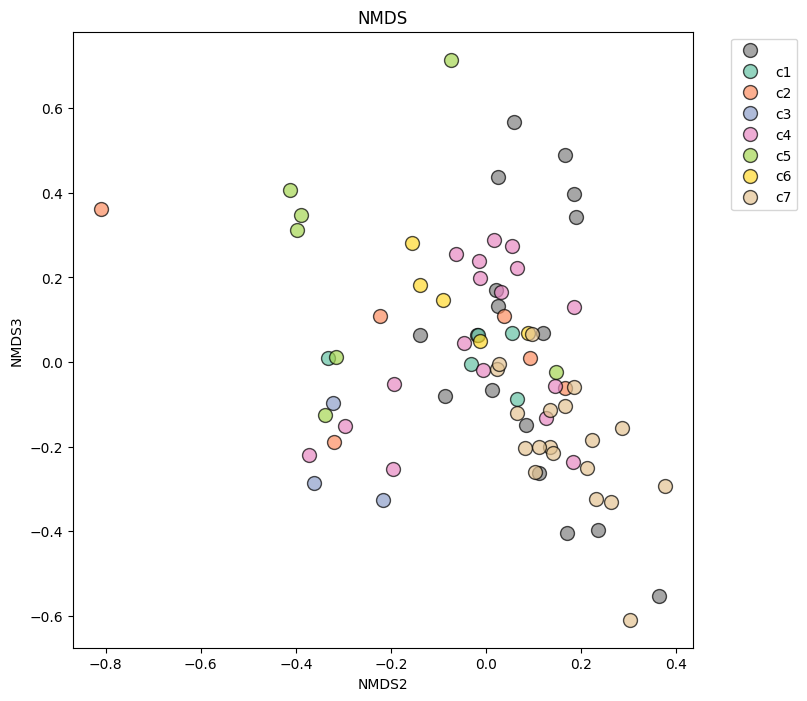

In [62]:
fig = plt.figure(figsize=(8, 8))
nmds_plot(npos_std, 
          # categories=df.loc[:, "new_name"].values,
          # colors= {"new_name_2": "#33CB85", "seemenii": "#33BAFF","incarum": "#F9918A"}, 
          categories=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          colors = {
                    "c6" : "#FFD92E",
                    "c4" : "#E789C3",
                    "c3" : "#8D9FCA",
                    "c5" : "#A6D753",
                    "c2" : "#FB8D61",
                    "c1" : "#66C2A4",
                    "c7" : "#E4C493",
                    " ": "gray"
                    },
          name=NAME,
          three_dimensional=False, 
          put_names=False,
          names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          components=(1, 2),
          marker_size=100,
          alpha=0.7,
         )

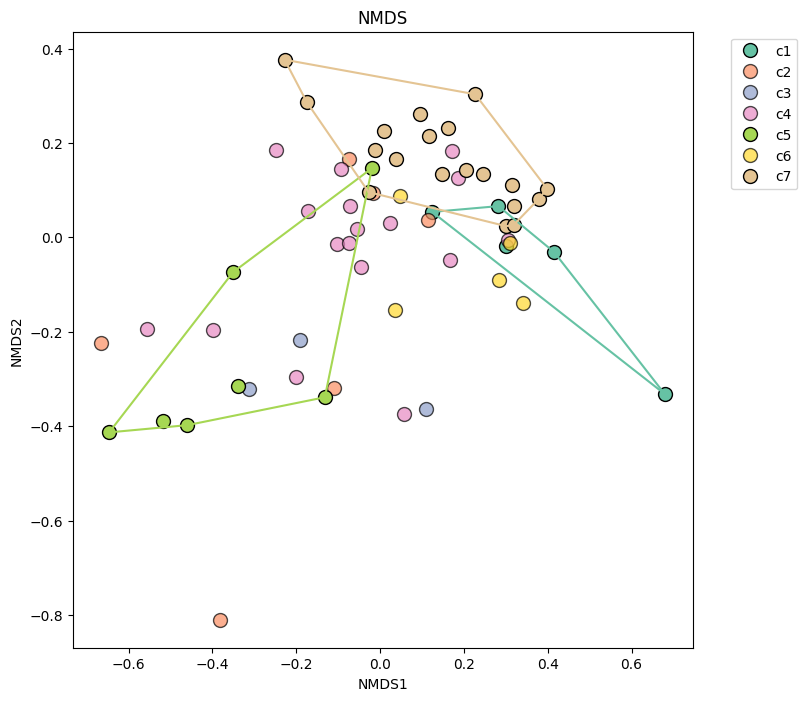

In [63]:
fig = plt.figure(figsize=(8, 8))
nmds_plot(npos_std, 
          # categories=df.loc[:, "new_name"].values,
          # colors= {"new_name_2": "#33CB85", "seemenii": "#33BAFF","incarum": "#F9918A"}, 
          categories=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          colors = {
                    "c6" : "#FFD92E",
                    "c4" : "#E789C3",
                    "c3" : "#8D9FCA",
                    "c5" : "#A6D753",
                    "c2" : "#FB8D61",
                    "c1" : "#66C2A4",
                    "c7" : "#E4C493",
                    " ": "gray",
                    },
          name=f"{NAME}_withConvex_ignoreUnclass",
          three_dimensional=False, 
          put_names=False,
          names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          components=(0, 1),
          marker_size=100,
          alpha=0.7,
          ignore_unclassified=True,
          convex=["c1", "c7", "c5"],
          remove_convex_points=False, convex_alpha=1.0
         )

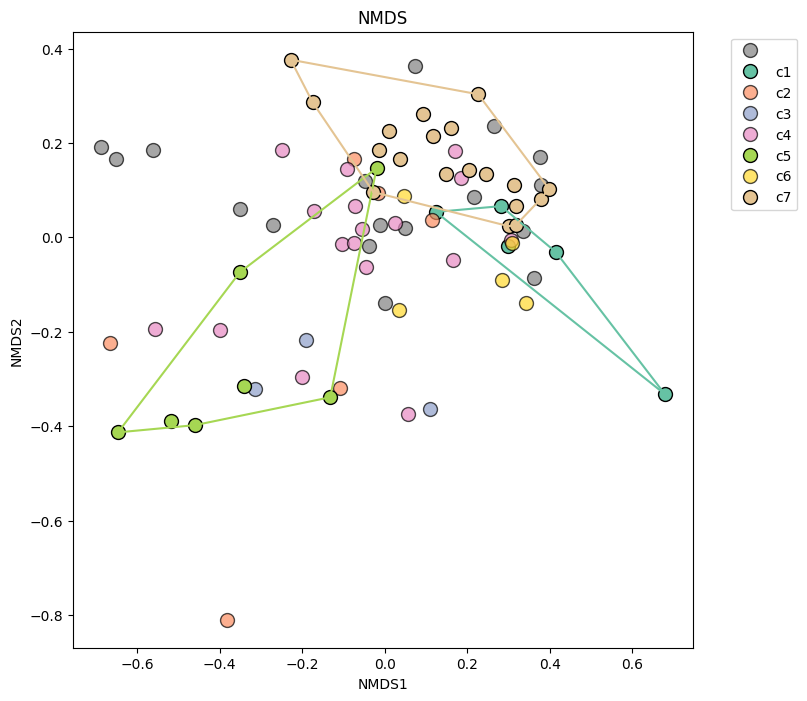

In [64]:
fig = plt.figure(figsize=(8, 8))
nmds_plot(npos_std, 
          # categories=df.loc[:, "new_name"].values,
          # colors= {"new_name_2": "#33CB85", "seemenii": "#33BAFF","incarum": "#F9918A"}, 
          categories=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          colors = {
                    "c6" : "#FFD92E",
                    "c4" : "#E789C3",
                    "c3" : "#8D9FCA",
                    "c5" : "#A6D753",
                    "c2" : "#FB8D61",
                    "c1" : "#66C2A4",
                    "c7" : "#E4C493",
                    " ": "gray",
                    },
          name=f"{NAME}_withConvex",
          three_dimensional=False, 
          put_names=False,
          names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          components=(0, 1),
          marker_size=100,
          alpha=0.7,
          ignore_unclassified=False,
          convex=["c1", "c7", "c5"],
          remove_convex_points=False, convex_alpha=1.0
         )

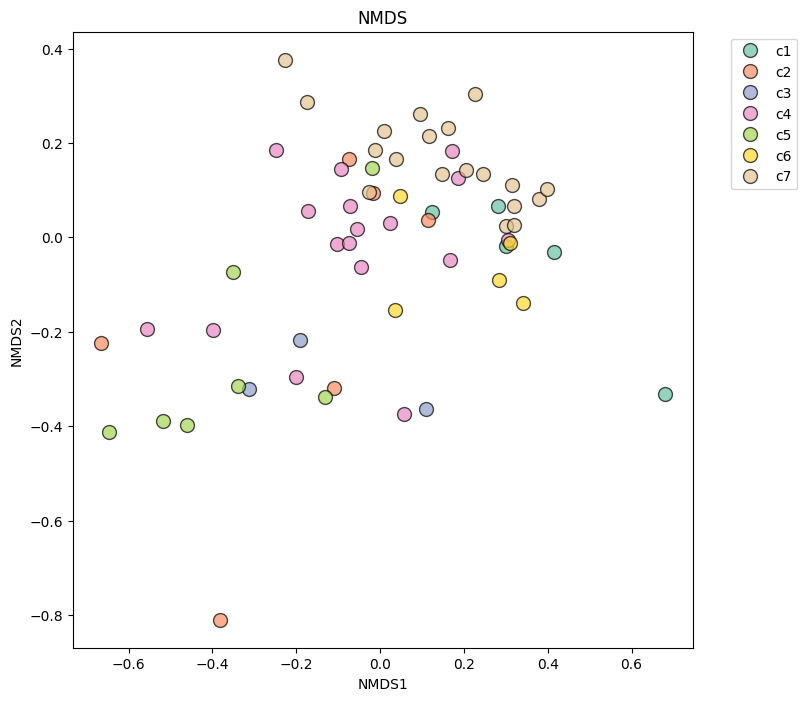

In [65]:
fig = plt.figure(figsize=(8, 8))
nmds_plot(npos_std, 
          # categories=df.loc[:, "new_name"].values,
          # colors= {"new_name_2": "#33CB85", "seemenii": "#33BAFF","incarum": "#F9918A"}, 
          categories=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          colors = {
                    "c6" : "#FFD92E",
                    "c4" : "#E789C3",
                    "c3" : "#8D9FCA",
                    "c5" : "#A6D753",
                    "c2" : "#FB8D61",
                    "c1" : "#66C2A4",
                    "c7" : "#E4C493",
                    " ": "white"
                    },
          name=f"{NAME}_ignoringUnClassified",
          three_dimensional=False, 
          put_names=False,
          names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          components=(0, 1),
          marker_size=100,
          alpha=0.7,
          ignore_unclassified=True,
         )

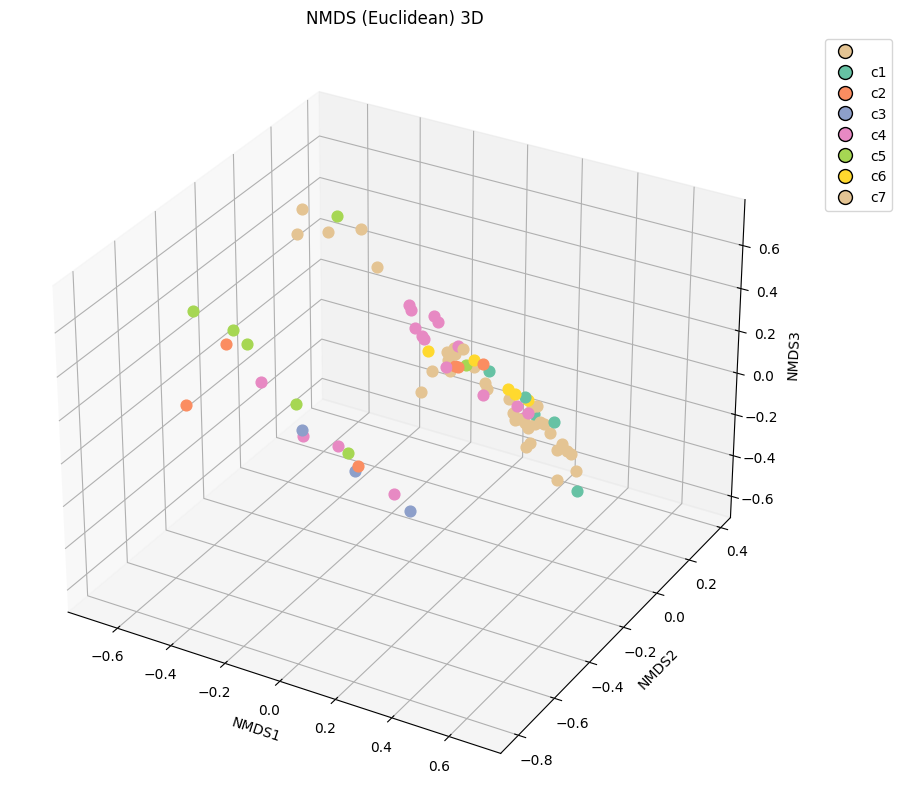

In [66]:
nmds_plot(npos_std, 
          # categories=df.loc[:, "new_name"].values,
          # colors= {"new_name_2": "#33CB85", "seemenii": "#33BAFF","incarum": "#F9918A"},    
          categories=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          colors = {
                    "c6" : "#FFD92E",
                    "c4" : "#E789C3",
                    "c3" : "#8D9FCA",
                    "c5" : "#A6D753",
                    "c2" : "#FB8D61",
                    "c1" : "#66C2A4",
                    "c7" : "#E4C493",
                    " ": "#E4C493FF" ##invisible
                    },
          name=NAME,
          three_dimensional=True, 
          rotation=(None, None),
          put_names=False,
          names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
          components=(0,1,2)
         )

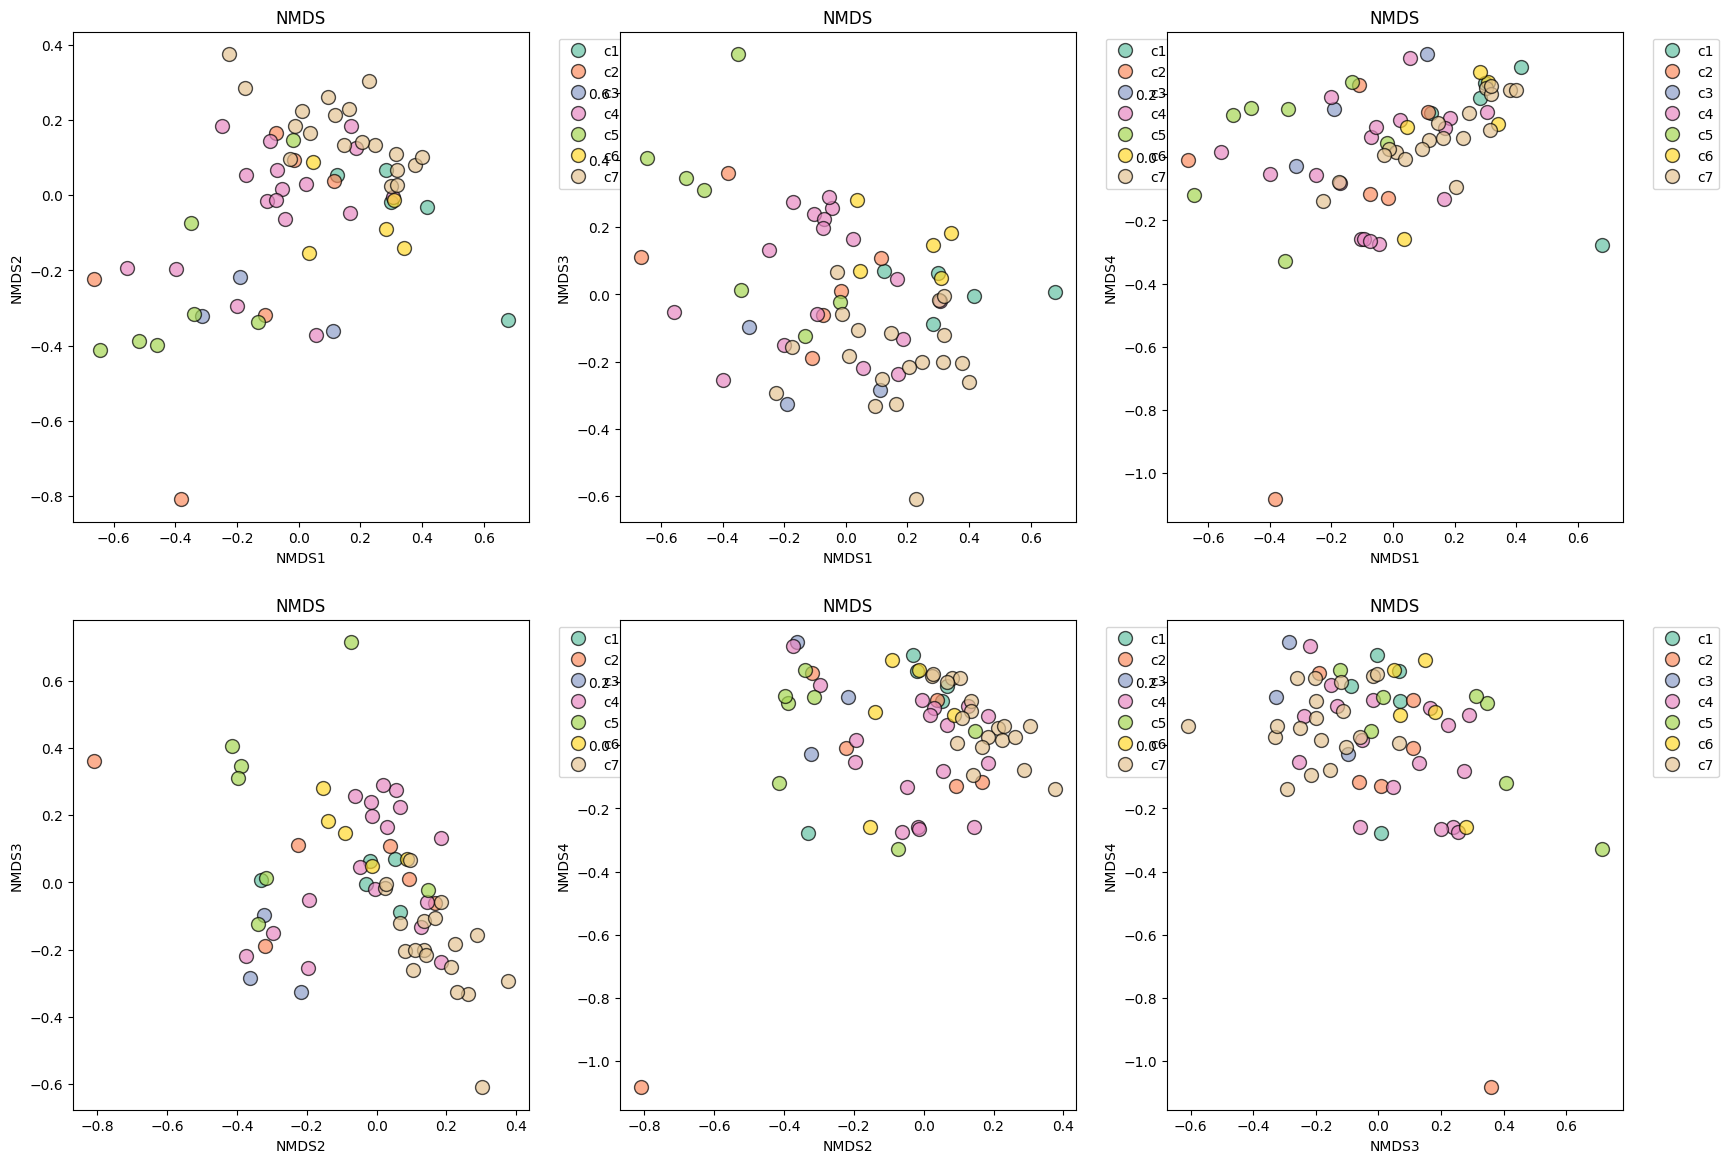

In [67]:
fig = plt.figure(figsize=(20, 14))
for i, comb in enumerate(itertools.combinations([0,1,2,3], r=2)):
    fig.add_subplot(2, 3, i+1)
    nmds_plot(npos_std, 
              save_svg=False, 
              components=comb, 
              three_dimensional=False, 
              # categories=df.loc[:, "new_name"].values, 
              # colors= {"new_name_2": "#33CB85", "seemenii": "#33BAFF","incarum": "#F9918A"},
              categories=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
              colors = {
                        "c6" : "#FFD92E",
                        "c4" : "#E789C3",
                        "c3" : "#8D9FCA",
                        "c5" : "#A6D753",
                        "c2" : "#FB8D61",
                        "c1" : "#66C2A4",
                        "c7" : "#E4C493",
                        " ": "white"
                        },
              put_names=False,
              names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
              alpha=0.7,
              marker_size=100,
              ignore_unclassified=True,
             )
    
# fig.show()
fig.savefig(f"./svgs/NMDS_allcomponents_altcols.svg")

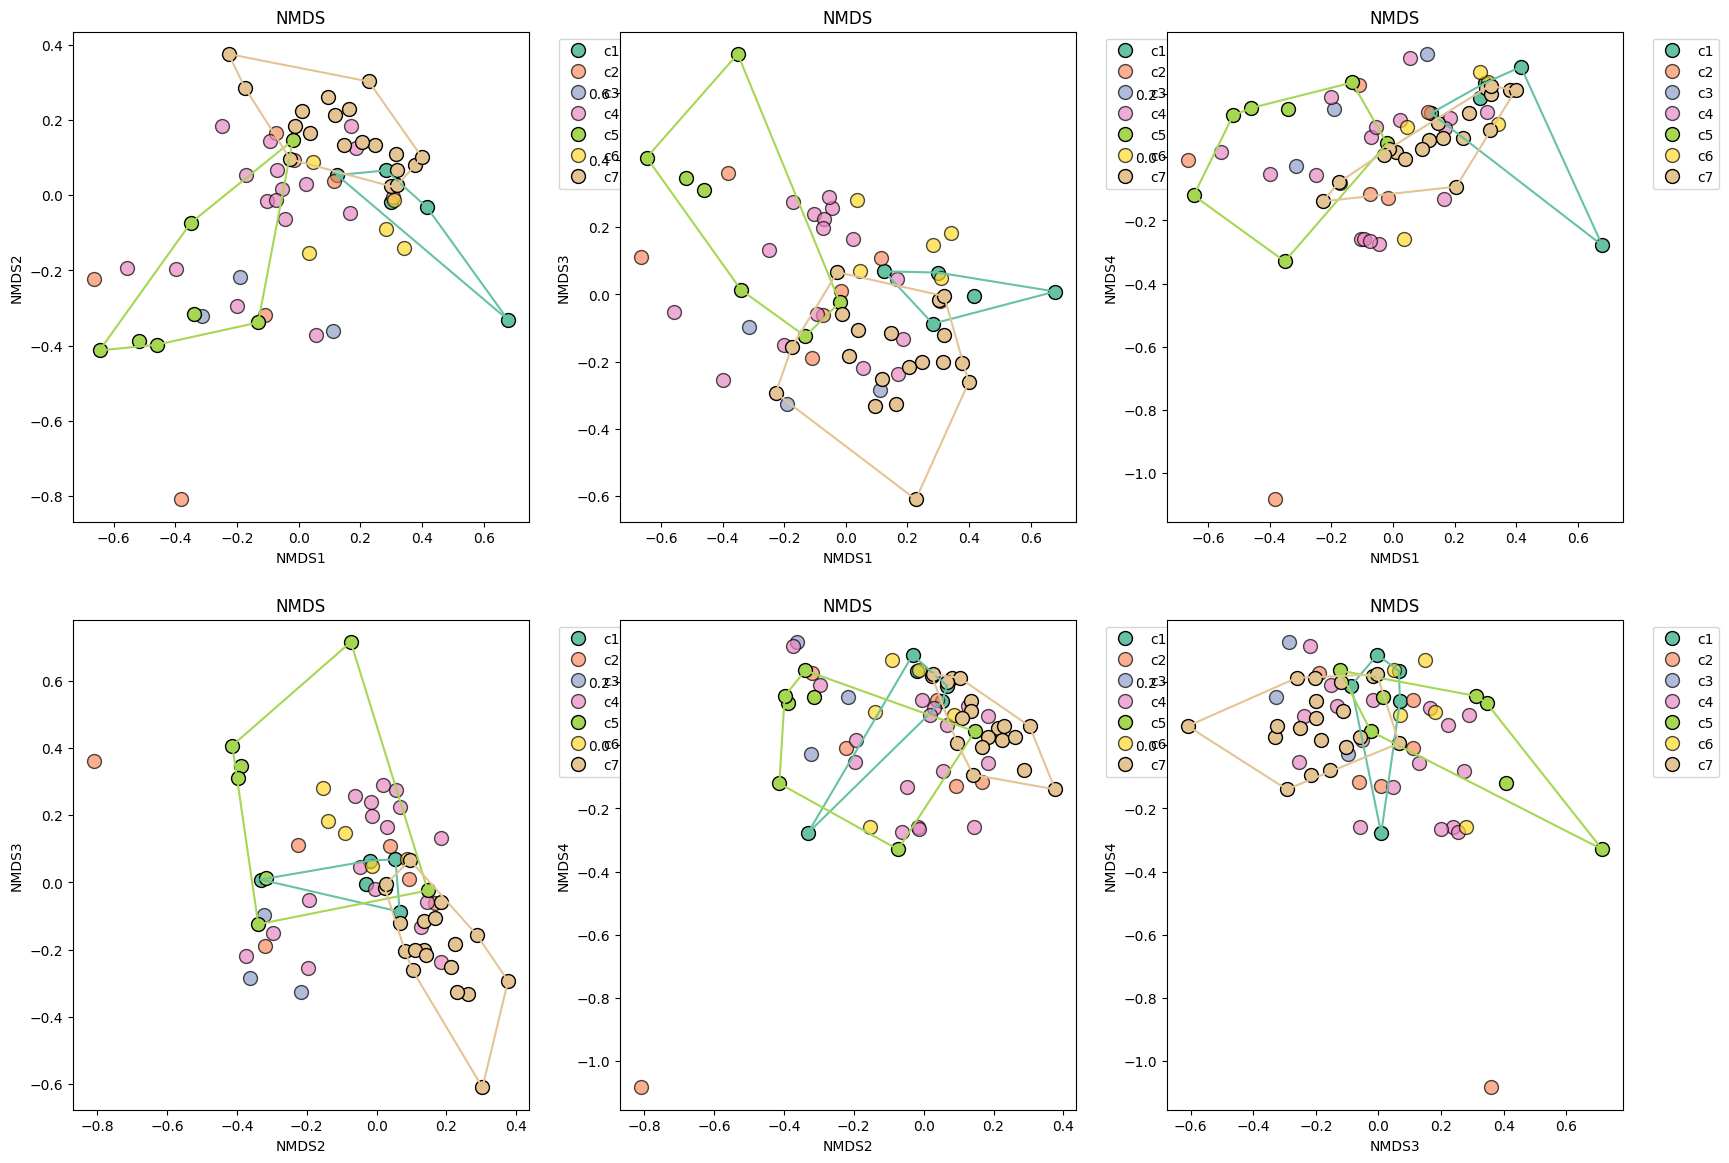

In [68]:
fig = plt.figure(figsize=(20, 14))
for i, comb in enumerate(itertools.combinations([0,1,2,3], r=2)):
    fig.add_subplot(2, 3, i+1)
    nmds_plot(npos_std, 
              save_svg=False, 
              components=comb, 
              three_dimensional=False, 
              # categories=df.loc[:, "new_name"].values, 
              # colors= {"new_name_2": "#33CB85", "seemenii": "#33BAFF","incarum": "#F9918A"},
              categories=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
              colors = {
                        "c6" : "#FFD92E",
                        "c4" : "#E789C3",
                        "c3" : "#8D9FCA",
                        "c5" : "#A6D753",
                        "c2" : "#FB8D61",
                        "c1" : "#66C2A4",
                        "c7" : "#E4C493",
                        " ": "white",
                        },
              put_names=False,
              names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
              alpha=0.7,
              marker_size=100,
              ignore_unclassified=True,
              convex=["c1", "c7", "c5"], convex_alpha=1.0, remove_convex_points=False
             )
    
# fig.show()
fig.savefig(f"./svgs/NMDS_allcomponents_withConvex_altcols.svg")

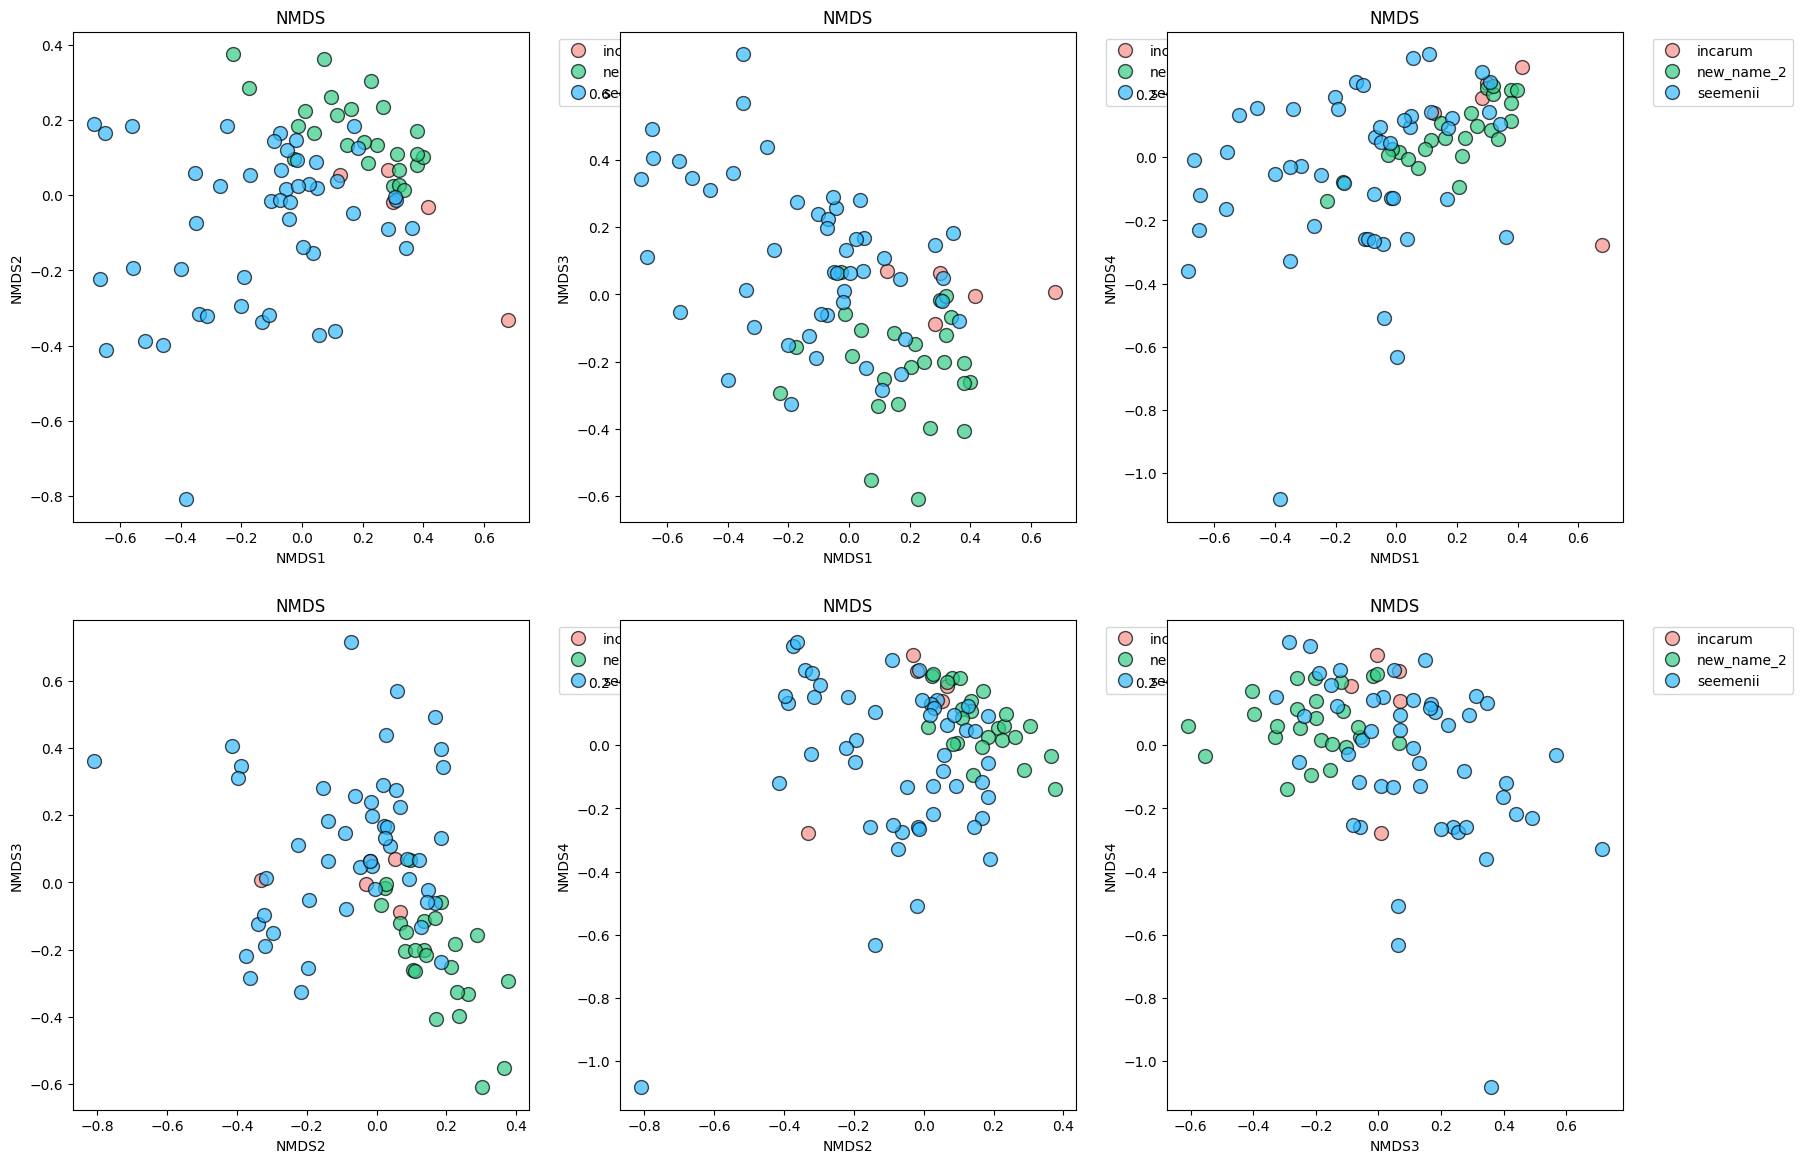

In [69]:
fig = plt.figure(figsize=(20,14))
for i, comb in enumerate(itertools.combinations([0,1,2,3], r=2)):
    fig.add_subplot(2, 3, i+1)
    nmds_plot(npos_std, 
              save_svg=False, 
              components=comb, 
              three_dimensional=False, 
              categories=df.loc[:, "new_name"].values, 
              colors= {"new_name_2": "#33CB85", "seemenii": "#33BAFF","incarum": "#F9918A"},              
              put_names=False,
              names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
              alpha=0.7,
              marker_size=100,
              ignore_unclassified=True,
             )
    
# fig.show()
fig.savefig(f"./svgs/NMDS_allcomponents_originalHypColors.svg")

#### Clustering

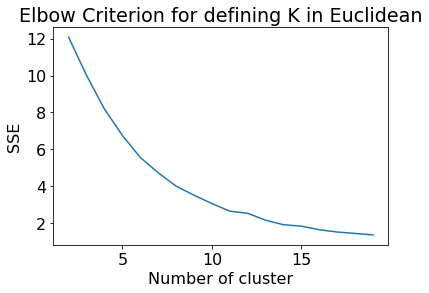

In [170]:
find_optimal_k(npos_std)

In [171]:
suggested_k = 2

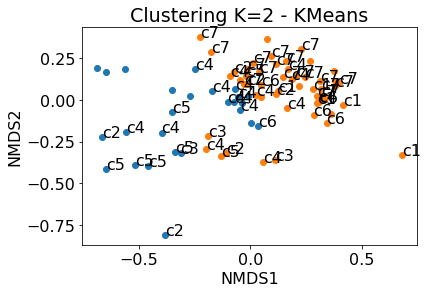

In [172]:
clustering(npos_std, n_clusters=suggested_k, three_dimensional=False, name=NAME,
           put_names=True,
           names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]])
          );

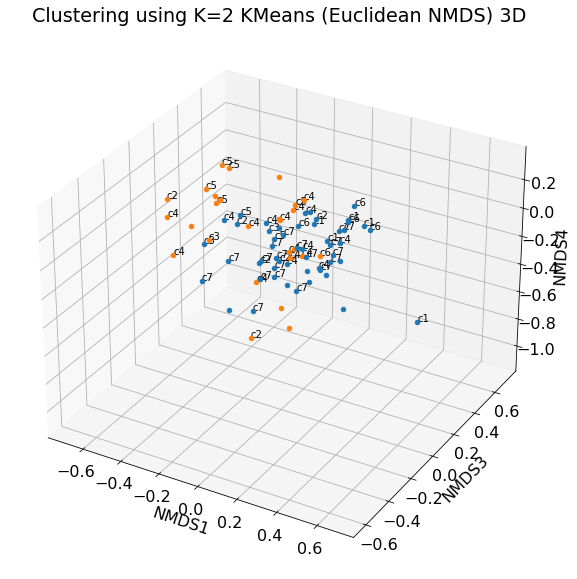

In [173]:
clustering(npos_std, n_clusters=suggested_k, 
           three_dimensional=True, 
           name=NAME,
           put_names=True,
           names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
           components=(0,2,3)
          )

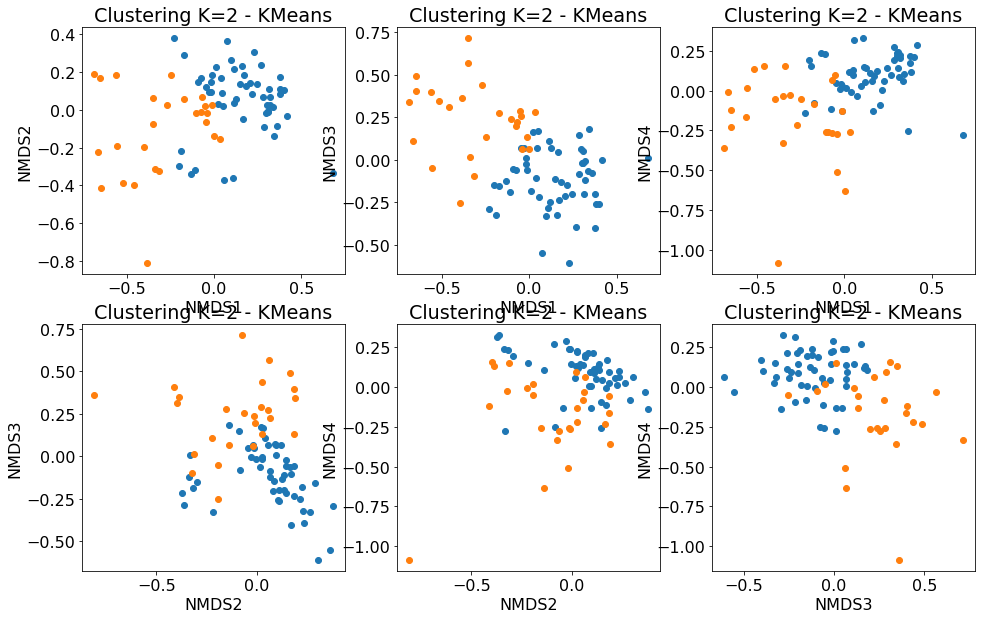

In [174]:
fig = plt.figure(figsize=(16, 10))
for i, comb in enumerate(itertools.combinations([0,1,2,3], r=2)):
    fig.add_subplot(2, 3, i+1)
    clustering(npos_std, 
              save_svg=False, 
              n_clusters=suggested_k,
              components=comb, 
              three_dimensional=False, 
              put_names=False,
              names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]])
             )
    
# fig.show()

In [ ]:
fig = plt.figure(figsize=(16, 10))
for i, comb in enumerate(itertools.combinations([0,1,2,3], r=2)):
    fig.add_subplot(2, 3, i+1)
    clustering(npos_std, 
              save_svg=False, 
              n_clusters=suggested_k,
              components=comb, 
              three_dimensional=False, 
              put_names=True,
              names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]])
             )
    
# fig.show()
plt.savefig(f"{NAME}_NMDS_colored_k4_kmeansClustersALL.png")

In [ ]:
fig = plt.figure(figsize=(10, 10))
clustering(npos_std, n_clusters=suggested_k, three_dimensional=False, name=NAME,
           put_names=True,
           names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
           components=(2,3)
          );

In [ ]:
suggested_k = 3

In [ ]:
fig = plt.figure(figsize=(16, 10))
for i, comb in enumerate(itertools.combinations([0,1,2,3], r=2)):
    fig.add_subplot(2, 3, i+1)
    clustering(npos_std, 
              save_svg=False, 
              n_clusters=suggested_k,
              components=comb, 
              three_dimensional=False, 
              put_names=True,
              names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]])
             )
    
# fig.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
clustering(npos_std, n_clusters=suggested_k, three_dimensional=False, name=NAME,
           put_names=True,
           names_array=np.array([cladesdict_morpho_names[i] for i in df["Specimen_ID"]]),
           components=(2,3)
          );